In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier
import graphviz
import matplotlib.pyplot as plt

In [63]:
df= pd.read_csv('speed_dating_data.csv')
df.head(50)

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,21.0,69487.0,2.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0
5,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0
6,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,7.0,4.0,6.0,7.0,6.0,5.0,2.0
7,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,6.0,5.0,6.0,6.0,7.0,NaN
8,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0
9,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,6.0,8.0,10.0,8.0,6.0,6.0,2.0


In [64]:
df.columns #target: dec features: income, attr, sinc, intel, fun, amb, 

Index(['gender', 'age', 'income', 'goal', 'career', 'dec', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')

In [65]:
len(df['career'].unique())

368

In [66]:
df.shape

(8378, 15)

In [67]:
df.dtypes

gender      int64
age       float64
income    float64
goal      float64
career     object
dec         int64
attr      float64
sinc      float64
intel     float64
fun       float64
amb       float64
shar      float64
like      float64
prob      float64
met       float64
dtype: object

In [68]:
df['id'] = df.set_index(['gender', 'age', 'income', 'career']).index.factorize()[0]+1

In [69]:
# dropping cols that are partner-dependent or have too many missings
df = df.drop(columns=['income', 'prob', 'shar', 'met', 'career', 'goal'])

In [70]:
#pd.set_option('display.max_rows', None)
print(df)

      gender   age  dec  attr  sinc  intel  fun  amb  like   id
0          0  21.0    1   6.0   9.0    7.0  7.0  6.0   7.0    1
1          0  21.0    1   7.0   8.0    7.0  8.0  5.0   7.0    1
2          0  21.0    1   5.0   8.0    9.0  8.0  5.0   7.0    1
3          0  21.0    1   7.0   6.0    8.0  7.0  6.0   7.0    1
4          0  21.0    1   5.0   6.0    7.0  7.0  6.0   6.0    1
...      ...   ...  ...   ...   ...    ...  ...  ...   ...  ...
8373       1  25.0    0   3.0   5.0    5.0  5.0  NaN   2.0  539
8374       1  25.0    0   4.0   6.0    8.0  4.0  4.0   4.0  539
8375       1  25.0    0   4.0   7.0    8.0  8.0  8.0   6.0  539
8376       1  25.0    0   4.0   6.0    5.0  4.0  NaN   5.0  539
8377       1  25.0    0   3.0   7.0    6.0  4.0  8.0   4.0  539

[8378 rows x 10 columns]


In [71]:
average_scores = df.groupby('id')[['attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'dec']].mean().reset_index()
average_scores

,id,attr,sinc,intel,fun,amb,like,dec
0,1,5.700000,7.300000,7.300000,6.800000,6.300000,6.500000,0.800000
1,2,6.400000,7.000000,7.700000,6.100000,6.500000,6.600000,0.400000
2,3,8.100000,8.600000,9.400000,7.700000,8.800000,8.200000,0.000000
3,4,6.400000,8.900000,8.600000,7.800000,7.800000,6.600000,0.300000
4,5,6.300000,6.000000,7.000000,6.000000,5.600000,7.200000,0.600000
...,...,...,...,...,...,...,...,...
534,535,4.476190,6.714286,5.809524,4.476190,3.904762,5.047619,0.409091
535,536,4.590909,7.045455,6.909091,6.727273,6.863636,5.363636,0.409091
536,537,5.636364,5.954545,5.772727,5.500000,5.045455,5.500000,0.318182
537,538,6.350000,7.100000,7.400000,6.700000,6.700000,7.150000,0.363636


In [72]:
df = df.groupby('id').first()
df = df.drop(columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'like','dec']).join(average_scores.set_index('id'), on = 'id')
df

,gender,age,attr,sinc,intel,fun,amb,like,dec
id,,,,,,,,,
1,0,21.0,5.700000,7.300000,7.300000,6.800000,6.300000,6.500000,0.800000
2,0,24.0,6.400000,7.000000,7.700000,6.100000,6.500000,6.600000,0.400000
3,0,25.0,8.100000,8.600000,9.400000,7.700000,8.800000,8.200000,0.000000
4,0,23.0,6.400000,8.900000,8.600000,7.800000,7.800000,6.600000,0.300000
5,0,21.0,6.300000,6.000000,7.000000,6.000000,5.600000,7.200000,0.600000
...,...,...,...,...,...,...,...,...,...
535,1,30.0,4.476190,6.714286,5.809524,4.476190,3.904762,5.047619,0.409091
536,1,28.0,4.590909,7.045455,6.909091,6.727273,6.863636,5.363636,0.409091
537,1,30.0,5.636364,5.954545,5.772727,5.500000,5.045455,5.500000,0.318182


In [73]:
#df.to_csv('match_clean.csv')

In [74]:
df.isna().sum()

gender    0
age       4
attr      0
sinc      1
intel     1
fun       1
amb       1
like      0
dec       0
dtype: int64

In [75]:
df= df.dropna()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


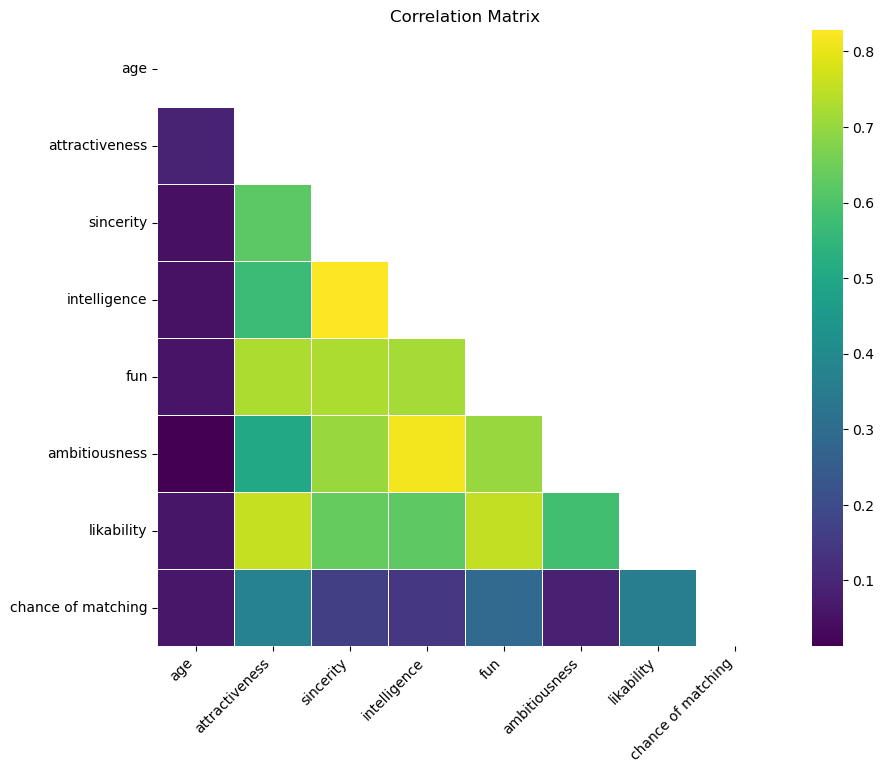

In [76]:
###### NEU
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define your renaming dictionary
rename_dict = {
    'attr': 'attractiveness',
    'sinc': 'sincerity',
    'intel': 'intelligence',
    'fun': 'fun',
    'amb': 'ambitiousness',
    'like': 'likability',
    'dec': 'chance of matching'
}

# Drop 'gender' column and rename columns just for this matrix
correlation_matrix = df.drop(columns=['gender']).rename(columns=rename_dict).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and rotated labels
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='viridis', square=True, linewidths=0.5)

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Correlation Matrix")
plt.show()

In [77]:
# Train Test Split
target = df['dec']
df = df.drop(columns= ['dec'])
features = df.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [78]:
normalizer = MinMaxScaler()

In [79]:
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [80]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,gender,age,attr,sinc,intel,fun,amb,like
0,0.0,0.243243,0.407692,0.604672,0.571921,0.511979,0.441729,0.573553
1,0.0,0.270270,0.289583,0.481132,0.535345,0.163043,0.620066,0.407063
2,1.0,0.135135,0.348148,0.492662,0.367816,0.385093,0.445175,0.529740
3,1.0,0.486486,0.572222,0.644205,0.577340,0.316770,0.390038,0.494689
4,0.0,0.486486,0.572222,0.688679,0.734483,0.685714,0.710526,0.560409


In [81]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [82]:
#knn.fit(X_train_norm, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
pred = knn.predict(X_test_norm)  
y_test.values

In [ ]:
knn.score(X_test_norm, y_test)

In [ ]:
# LOGISTIC REGRESSION 

lr = LogisticRegression()
lr.fit(X_train_norm, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test_norm)

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

In [ ]:
# DECISION TREE 

dt = DecisionTreeClassifier(random_state=0, max_depth=15)
dt.fit(X_train, y_train)

In [ ]:
y_pred_dt= dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

In [ ]:
print(type(X_test))
plt.figure(figsize=(12, 8))
plot_tree(dt)

# RANDOM FOREST

### hyperparameter tuning

In [91]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
import numpy as np

In [93]:
# Initialize a basic RandomForestClassifier with a fixed random state for reproducibility
rf = RandomForestRegressor(random_state=42)

# Print the current default parameters of the RandomForestClassifier
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [95]:
# --- Hyperparameter Grid Setup for Randomized Search ---

# Define a range of hyperparameters to test in the RandomizedSearchCV
# List of potential values for the number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start=3, stop=100, num=10)]

# Maximum depth of each tree
max_depth = [int(x) for x in np.linspace(3, 110, num=11)]
max_depth.append(None)  # Include None to allow unlimited depth

# Minimum samples required to split a node
min_samples_split = [2, 5, 10]

# Combine all parameters into a dictionary for randomized search
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split}

# Display the parameter grid
pprint(random_grid)

{'max_depth': [3, 13, 24, 35, 45, 56, 67, 77, 88, 99, 110, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [3, 13, 24, 35, 46, 56, 67, 78, 89, 100]}


In [97]:
# --- Randomized Search for Hyperparameter Tuning ---
# Instantiate a new RandomForestClassifier as a base model for tuning
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV with the random grid, 3-fold cross-validation,
# 100 different parameter combinations, and verbose output for tracking progress
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               random_state=42)

# Fit the randomized search model to the training data
rf_random.fit(X_train, y_train)

# Retrieve the best parameters from the randomized search
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END .max_depth=77, min_samples_split=5, n_estimators=46; total time=   0.1s
[CV] END .max_depth=77, min_samples_split=5, n_estimators=46; total time=   0.1s
[CV] END .max_depth=77, min_samples_split=5, n_estimators=46; total time=   0.1s
[CV] END .max_depth=13, min_samples_split=5, n_estimators=24; total time=   0.0s
[CV] END .max_depth=13, min_samples_split=5, n_estimators=24; total time=   0.0s
[CV] END .max_depth=13, min_samples_split=5, n_estimators=24; total time=   0.0s
[CV] END .max_depth=99, min_samples_split=5, n_estimators=56; total time=   0.1s
[CV] END .max_depth=99, min_samples_split=5, n_estimators=56; total time=   0.1s
[CV] END .max_depth=99, min_samples_split=5, n_estimators=56; total time=   0.1s
[CV] END max_depth=110, min_samples_split=2, n_estimators=24; total time=   0.1s
[CV] END max_depth=110, min_samples_split=2, n_estimators=24; total time=   0.1s
[CV] END max_depth=110, min_samples_split=2, n

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3}

In [ ]:
# --- Model Evaluation Function ---
# Define a function to evaluate the model performance using Mean Absolute Percentage Error (MAPE) and accuracy
from sklearn.metrics import accuracy_score, mean_absolute_error

# Define a function to evaluate model performance for classification
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions) * 100
    mae = mean_absolute_error(y_test, predictions)
    print('Model Performance')
    print(f'Accuracy = {accuracy:.2f}%')
    print(f'Mean Absolute Error: {mae:.4f}')
    return accuracy


In [ ]:
# --- Baseline Model Evaluation ---

# Initialize a basic RandomForestClassifier with minimal tuning (10 estimators)
base_model = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=3)
base_model.fit(X_train, y_train)

# Evaluate the baseline model on the test data
base_accuracy = evaluate(base_model, X_test, y_test)

# Evaluate the best model from the randomized search on the test data
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

# Print the improvement in accuracy with the best randomized model over the baseline
print('Improvement of {:0.2f}%.'.format(random_accuracy - base_accuracy))

In [ ]:
# --- Hyperparameter Grid Setup for Grid Search ---

# Define a smaller parameter grid for a more exhaustive grid search around the best randomized parameters
param_grid = {'n_estimators': [80, 90, 100, 110, 120],
              'min_samples_split': [2, 3, 4, 5],
              'max_depth': [2, 3, 4, 5]}

#{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3}

# Instantiate a new RandomForestClassifier as a base model for grid search
rf = RandomForestClassifier()

# Initialize GridSearchCV with the parameter grid, 3-fold cross-validation,
# and parallel processing for faster execution
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters from the grid search
grid_search.best_params_

# Evaluate the best model from the grid search on the test data
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

# Print the improvement in accuracy with the best grid model over the baseline
print('Improvement of {:0.2f}%.'.format(100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [ ]:
# our original best working model
rf= RandomForestClassifier(n_estimators=10, random_state=0, max_depth=3)
rf.fit(X_train, y_train)

In [ ]:
y_pred_rf= rf.predict(X_test)

In [ ]:
accuracy_rf= accuracy_score(y_test, y_pred_rf)
accuracy_rf

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

# ONE TREE
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[9], filled=True)
plt.show()

In [ ]:
# adaptive boosting

ada_cl = AdaBoostClassifier(RandomForestClassifier(max_depth=10),
                            n_estimators=3)

In [ ]:
ada_cl.fit(X_train_norm, y_train)

In [ ]:
y_pred_abc = ada_cl.predict(X_test_norm)